In [34]:
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm 
from ISLP import load_data , confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

roc_curve = RocCurveDisplay.from_estimator

Support Vector Classifier

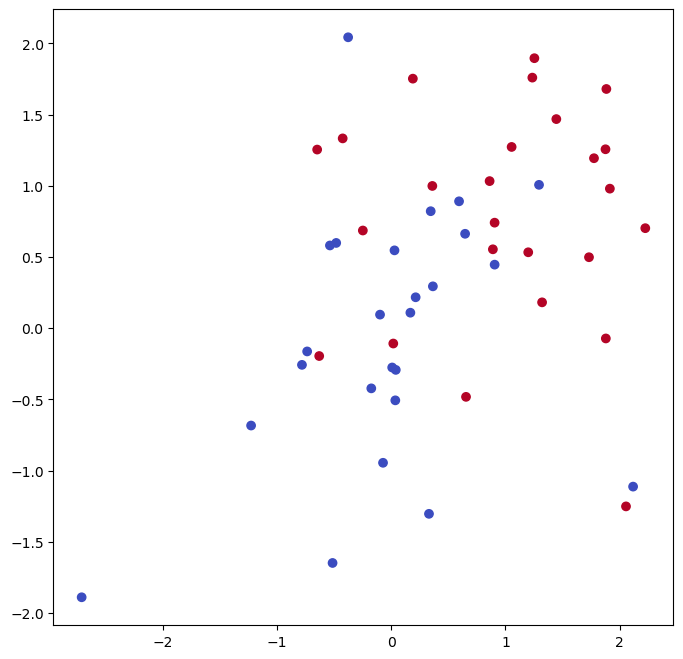

In [8]:
rng = np.random.default_rng (1)
X = rng.standard_normal ((50, 2))
y = np.array ([ -1]*25+[1]*25)
X[y==1] += 1

fig , ax = subplots(figsize =(8 ,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

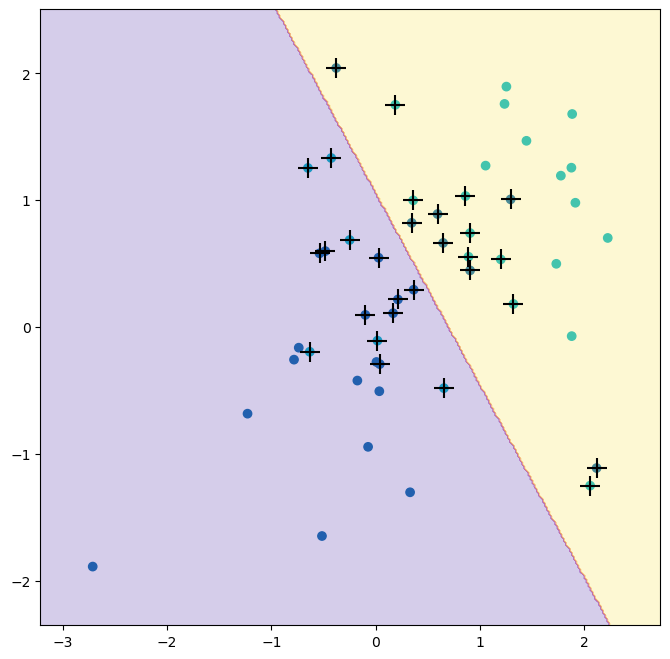

In [6]:
svm_linear = SVC(C=10, kernel="linear")
svm_linear.fit(X, y)

fig , ax = subplots(figsize =(8 ,8))
plot_svm(X, y, svm_linear, ax=ax)

array([[1.17303943, 0.77348227]])

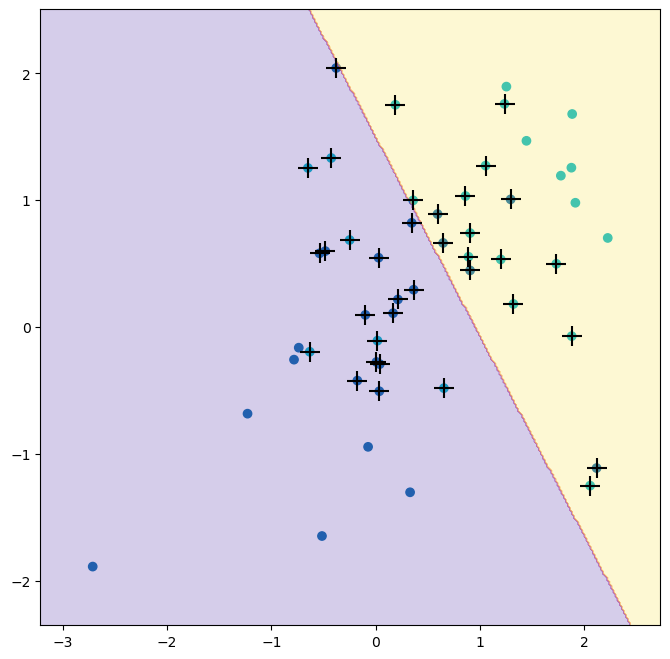

In [10]:
svm_linear_small = SVC(C=0.1, kernel="linear")
svm_linear_small.fit(X, y)

fig , ax = subplots(figsize =(8 ,8))
plot_svm(X, y, svm_linear_small, ax=ax)

svm_linear.coef_

In [13]:
kfold = skm.KFold(5, random_state =0, shuffle=True)
grid = skm.GridSearchCV(svm_linear, {"C":[0.001 ,0.01 ,0.1 ,1 ,5 ,10 ,100]}, refit=True, cv=kfold, scoring="accuracy")

grid.fit(X, y)
print(grid.best_params_, grid.cv_results_ [("mean_test_score")])

{'C': 1} [0.46 0.46 0.72 0.74 0.74 0.74 0.74]


In [15]:
X_test = rng.standard_normal ((20, 2))
y_test = np.array ([ -1]*10+[1]*10)
X_test[y_test ==1] += 1

best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,10,2
1,0,8


In [16]:
svm_ = SVC(C=0.001 , kernel="linear").fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,4,0
1,6,10


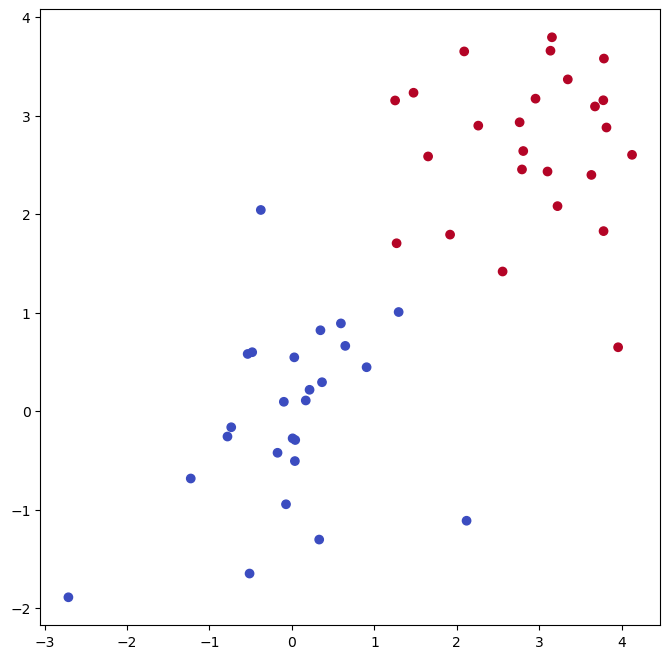

In [17]:
X[y==1] += 1.9;
fig , ax = subplots(figsize =(8 ,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [18]:
svm_ = SVC(C=1e5 , kernel="linear").fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


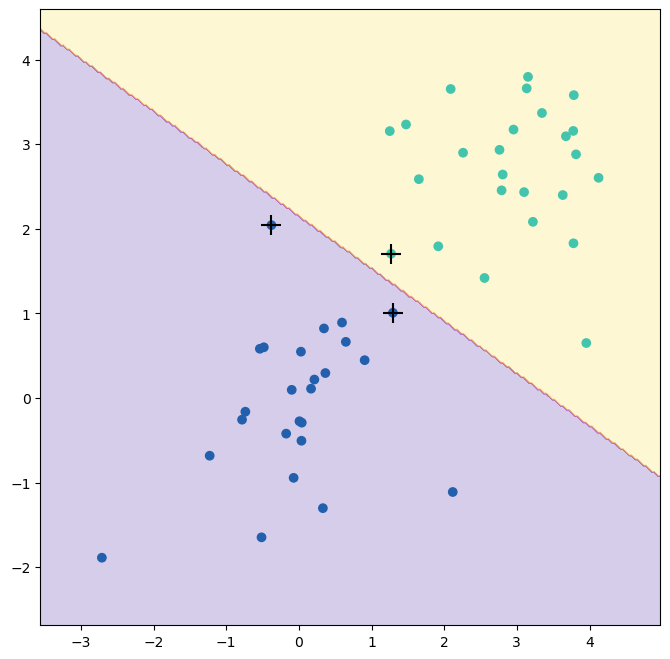

In [19]:
fig , ax = subplots(figsize =(8 ,8))
plot_svm(X, y, svm_, ax=ax)

In [20]:
svm_ = SVC(C=0.1, kernel="linear").fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


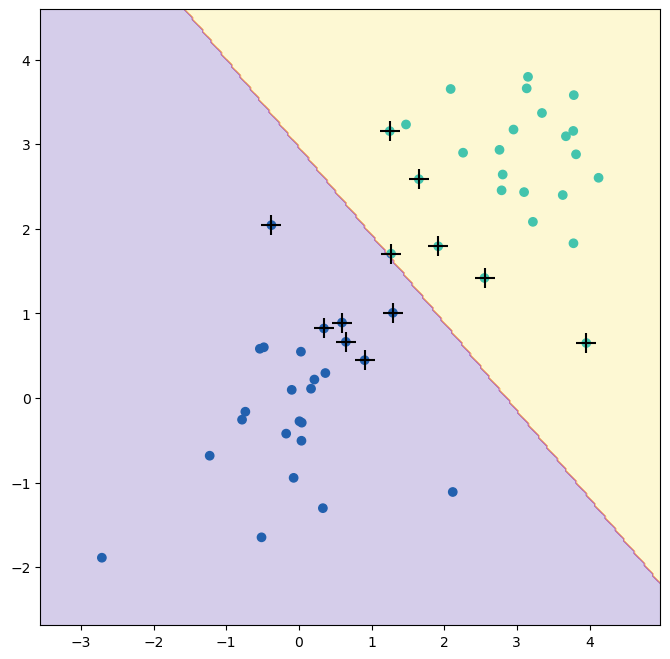

In [21]:
fig , ax = subplots(figsize =(8 ,8))
plot_svm(X, y, svm_, ax=ax)

Support Vector Machine

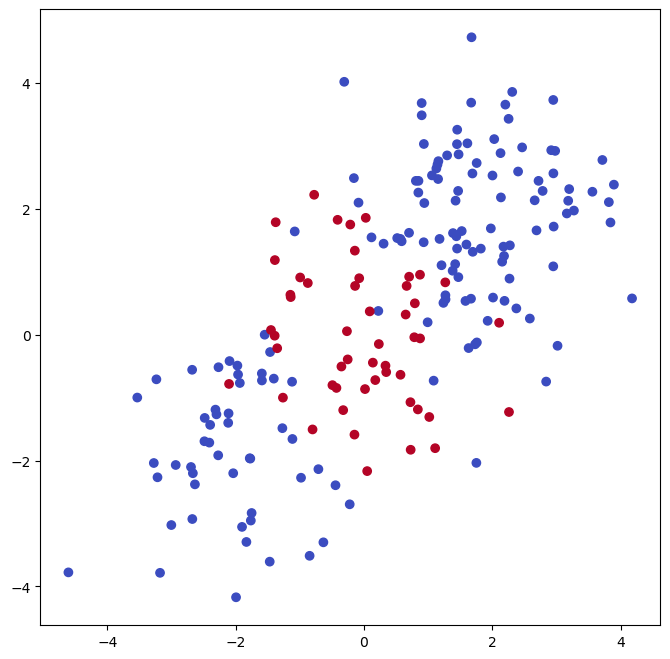

In [23]:
X = rng.standard_normal ((200 , 2))
X[:100] += 2
X[100:150] -= 2
y = np.array ([1]*150+[2]*50)

fig , ax = subplots(figsize =(8 ,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

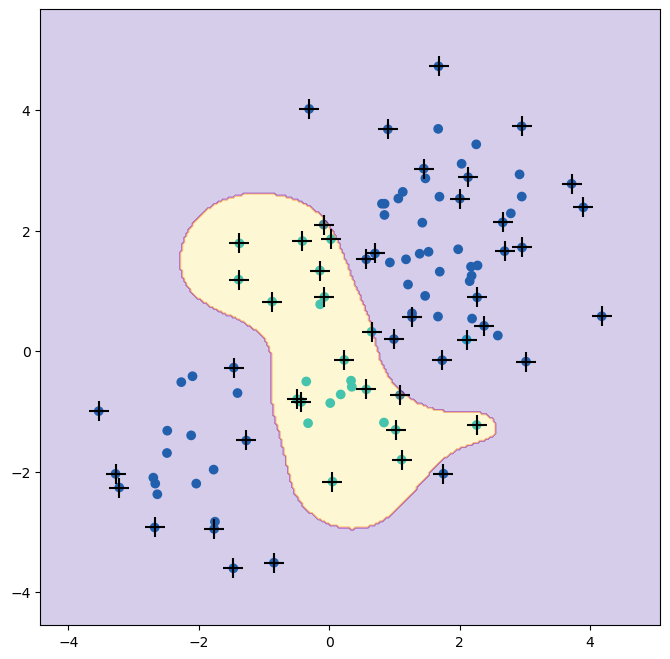

In [26]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, y, test_size =0.5, random_state =0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train , y_train)

fig, ax = subplots(figsize =(8 ,8))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

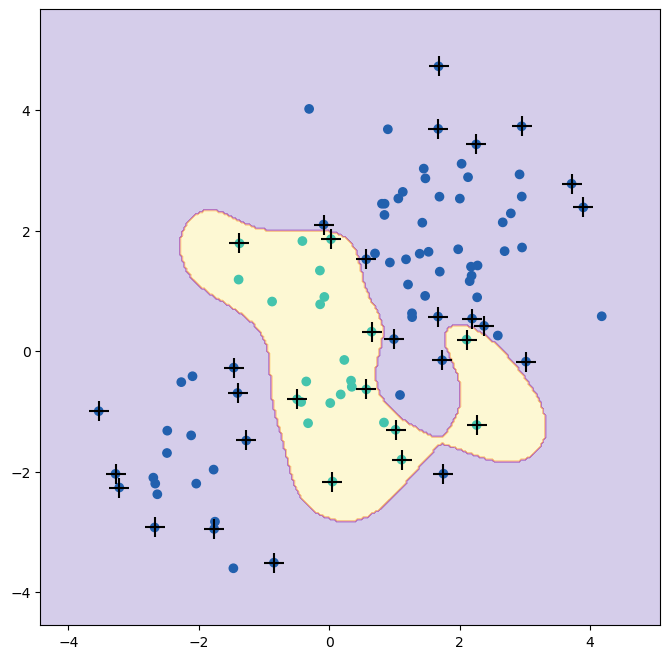

In [30]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train , y_train)

fig , ax = subplots(figsize =(8 ,8))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

In [31]:
kfold = skm.KFold(5, random_state =0, shuffle=True)
grid = skm.GridSearchCV(svm_rbf, {"C":[0.1 ,1 ,10 ,100 ,1000], "gamma":[0.5,1,2,3,4]}, refit=True , cv=kfold, scoring="accuracy");
grid.fit(X_train , y_train)

grid.best_params_

{'C': 10, 'gamma': 1}

Truth,1,2
Predicted,,
1,70,11
2,5,14


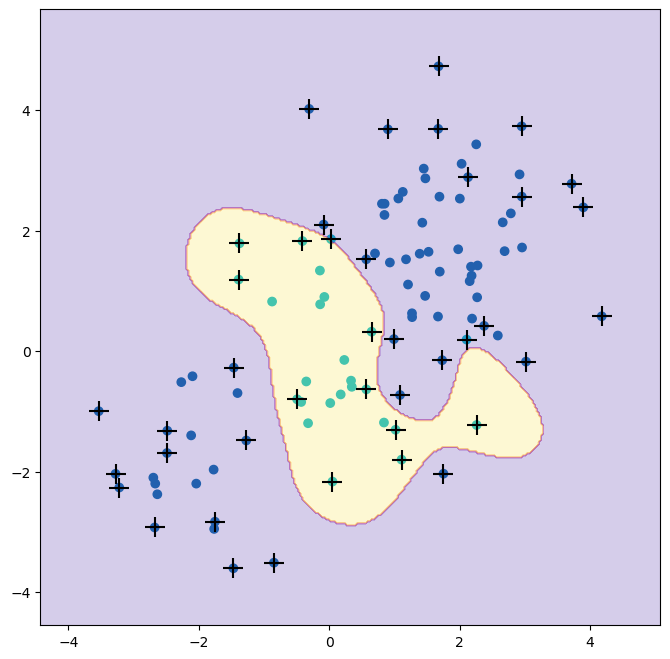

In [32]:
best_svm = grid.best_estimator_
fig , ax = subplots(figsize =(8 ,8))
plot_svm(X_train, y_train, best_svm, ax=ax)

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test , y_test)

ROC Curves

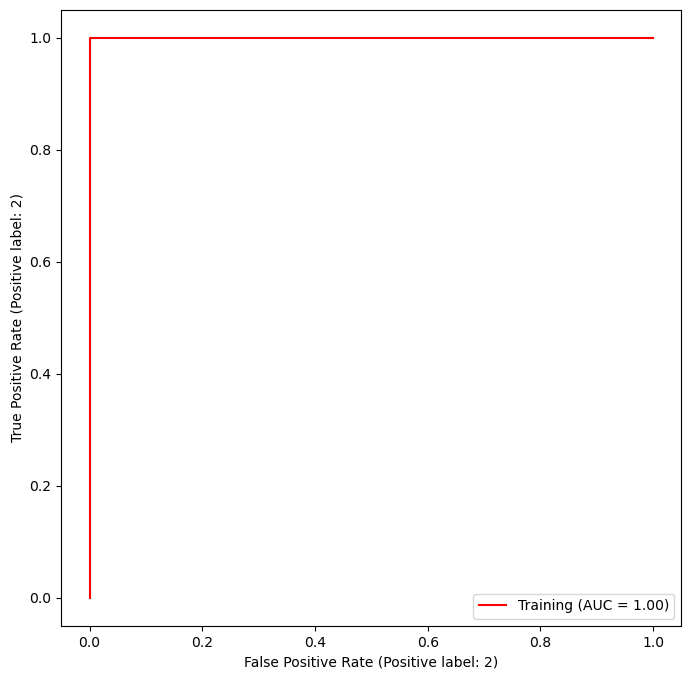

In [35]:
fig , ax = subplots(figsize =(8 ,8))
roc_curve(best_svm, X_train, y_train, name="Training", color="r", ax=ax);

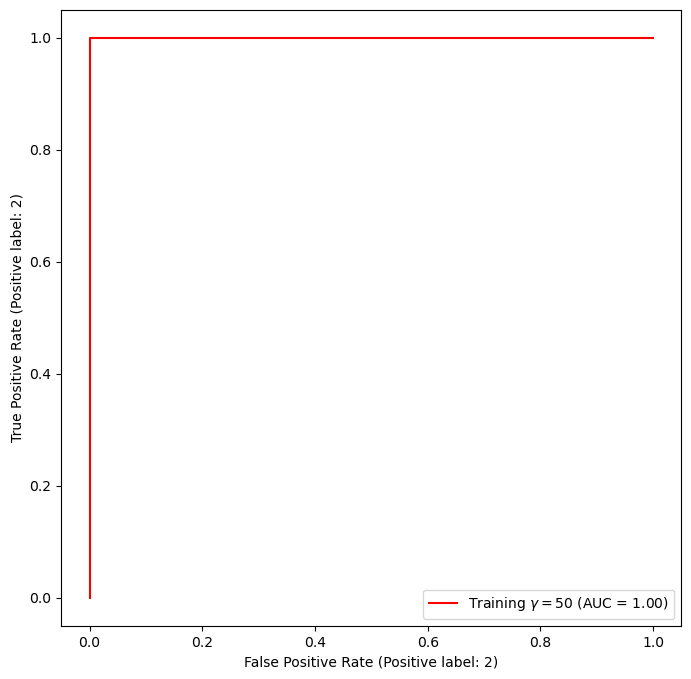

In [36]:
svm_flex = SVC(kernel="rbf", gamma =50, C=1)
svm_flex.fit(X_train , y_train)
fig , ax = subplots(figsize =(8 ,8))
roc_curve(svm_flex, X_train, y_train, name="Training $\gamma =50$", color="r", ax=ax);

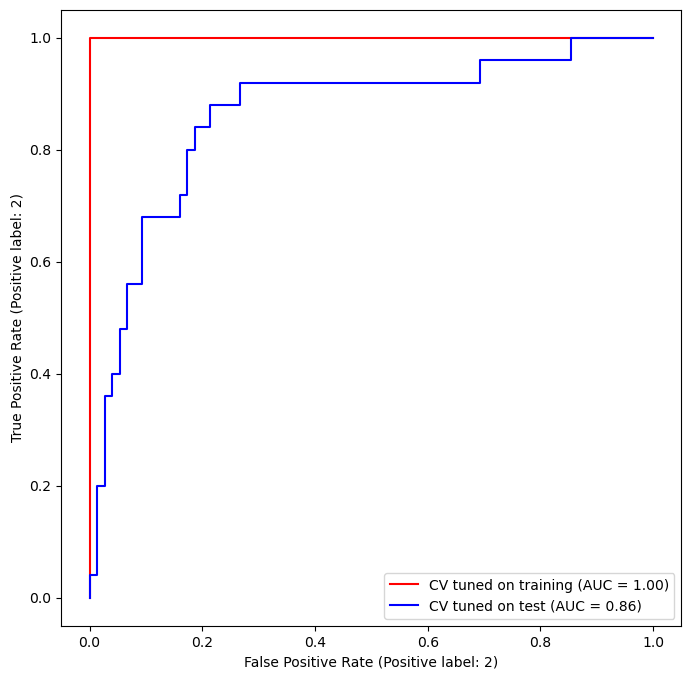

In [41]:
fig , ax = subplots(figsize =(8 ,8))
for (X_ , y_ , c, name) in zip((X_train , X_test), (y_train , y_test), ("r", "b"), ("CV tuned on training", "CV tuned on test")):
    roc_curve(best_svm, X_, y_, name=name, ax=ax, color=c)

SVM with Multiple Classes

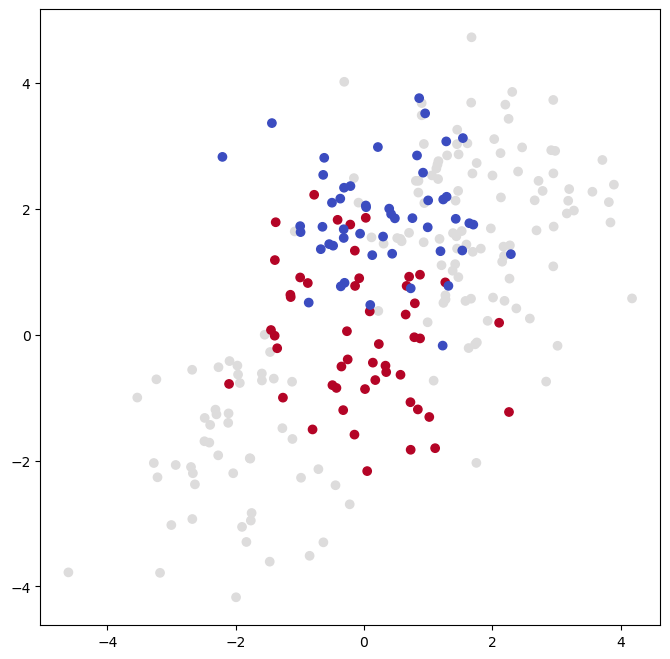

In [42]:
rng = np.random.default_rng (123)
X = np.vstack ([X, rng.standard_normal ((50, 2))])
y = np.hstack ([y, [0]*50])
X[y==0 ,1] += 2

fig , ax = subplots(figsize =(8 ,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

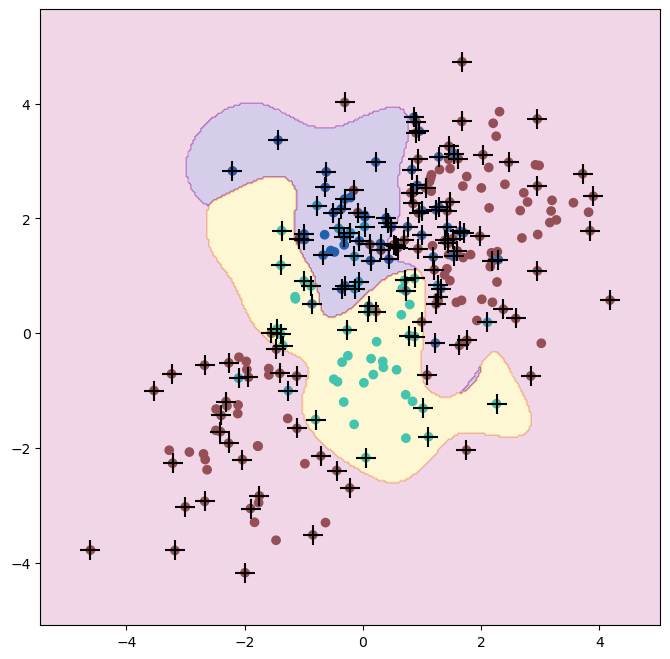

In [43]:
svm_rbf_3 = SVC(kernel="rbf", C=10, gamma=1, decision_function_shape="ovo");
svm_rbf_3.fit(X, y)
fig , ax = subplots(figsize =(8 ,8))
plot_svm(X, y, svm_rbf_3, scatter_cmap=cm.tab10, ax=ax)

Application to Gene Expression Data

In [45]:
Khan = load_data("Khan")
Khan["xtrain"].shape , Khan["xtest"]. shape

khan_linear = SVC(kernel="linear", C=10)
khan_linear.fit(Khan["xtrain"], Khan["ytrain"])
confusion_table(khan_linear.predict(Khan["xtrain"]), Khan["ytrain"])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [46]:
confusion_table(khan_linear.predict(Khan["xtest"]), Khan["ytest"])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
